## Installing necessary libraries

In [1]:
#Installing necessary libraries
!pip install BeautifulSoup4
!pip install folium
!pip install geocoder

## Importing libraries needed

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import folium
from geopy.geocoders import Nominatim
import numpy as np
from project_lib import Project
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
import seaborn as sns

## Data scraping zip codes of cities and municipalities in Iloilo province

In [3]:
url = "https://sites.google.com/site/departmentofphilippines/philippine-zip-codes/provincial-zip-codes/iloilo-zip-codes"

# makes a request to the web page and gets its HTML
r = requests.get(url)

# stores the HTML page in 'soup', a BeautifulSoup object
soup = BeautifulSoup(r.content)

In [4]:
#getting necessary data in the data frame
a = []
Zip_Code_df = pd.DataFrame(columns = ['Location', 'Zip Code', 'Phone Area Code'])
for link in soup.find_all('td'):
    a.append(link.get_text())
    if len(a) == 3:
        df_length = len(Zip_Code_df)
        Zip_Code_df.loc[df_length] = a
        a = []
Zip_Code_df.head()

,Location,Zip Code,Phone Area Code
0,Department of Philippines,Search this site,\n
1,\nThe GovernmentDepartment of Philippines Home...,\n\n \n\nPhilippine ZIP Codes and Area Codes‎ ...,Location\n\n\nZIP Code\n\n\nPhone \n\t\t\t\t\t...
2,Location\n,\nZIP Code\n,\nPhone \n\t\t\t\t\t\t\tArea Code\n
3,\n\t\t\t\t\t\t\tAjuy,\n\t\t\t\t\t\t\t5012,\n\t\t\t\t\t\t\t33
4,\n\t\t\t\t\t\t\tAlimodian,\n\t\t\t\t\t\t\t5028,\n\t\t\t\t\t\t\t33


## Cleaning the data frame

In [5]:
#Cleaning the data frame

#Removing unnecessary texts
Zip_Code_df = Zip_Code_df.replace(['\n','\t','\f'],['','',''], regex=True)

#Removing unnecessary rows and columns
Zip_Code_df = Zip_Code_df.drop(index=range(0,3))
Zip_Code_df = Zip_Code_df.drop(columns='Phone Area Code')

#Reseting the number of indices
Zip_Code_df = Zip_Code_df.reset_index(drop=True)

#Adding address for geocode
for i in range(len(Zip_Code_df['Zip Code'])):
    Zip_Code_df['Zip Code'][i] = Zip_Code_df['Zip Code'][i] + ', Iloilo, Philippines'

Zip_Code_df.head()

,Location,Zip Code
0,Ajuy,"5012, Iloilo, Philippines"
1,Alimodian,"5028, Iloilo, Philippines"
2,Anilao,"5009, Iloilo, Philippines"
3,Badiangan,"5033, Iloilo, Philippines"
4,Balasan,"5018, Iloilo, Philippines"


## Getting the latitude and longitude of each municipality

In [6]:
# Adding blank columns Latitude and Longitude to Zip_Code_df data frame
Zip_Code_df['Latitude'] = np.nan
Zip_Code_df['Longitude'] = np.nan

# Getting the latitude and longitude of each Location using geocoder api and appending it to the Zip_Code_df data frame
geolocator = Nominatim(user_agent="cal_explorer")

for j in range(len(Zip_Code_df['Zip Code'])):
    location = geolocator.geocode(Zip_Code_df['Zip Code'][j])
    Zip_Code_df['Latitude'][j] = location.latitude
    Zip_Code_df['Longitude'][j] = location.longitude
    
Zip_Code_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Location,Zip Code,Latitude,Longitude
0,Ajuy,"5012, Iloilo, Philippines",11.094578,123.030060
1,Alimodian,"5028, Iloilo, Philippines",10.953460,122.575633
2,Anilao,"5009, Iloilo, Philippines",10.987694,122.744439
3,Badiangan,"5033, Iloilo, Philippines",10.989759,122.556942
4,Balasan,"5018, Iloilo, Philippines",11.468541,123.095827
5,Banate,"5010, Iloilo, Philippines",11.002466,122.819422
6,Barotac Nuevo,"5007, Iloilo, Philippines",10.902800,122.743625
7,Barotac Viejo,"5011, Iloilo, Philippines",11.052759,122.862330
8,Batad,"5016, Iloilo, Philippines",11.392421,123.144555
9,Bingawan,"5041, Iloilo, Philippines",11.234870,122.568354


## Visualizing the map of Iloilo municipalities using folium

In [7]:
# create map of Toronto using latitude and longitude values
map_iloilo = folium.Map(location=[10.6079, 123.8858], zoom_start=10)

# add markers to map
for lat, lng, location in zip(Zip_Code_df['Latitude'], Zip_Code_df['Longitude'], Zip_Code_df['Location']):
    label = folium.Popup(location, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_iloilo)  
    
map_iloilo

## Getting the cluster of Passi City in the revenue count of whole Iloilo province

#### Visualize ranking of Passi City in terms of revenue 

In [8]:
# initialize list of revenues each municipality in the province of Iloilo
data = [['Ajuy', 114631989.8], ['Alimodian', 101434942.8], ['Anilao', 79750981.88], ['Badiangan', 72392644.72], ['Balasan', 82613191.46], ['Banate', 86704022.88], ['Barotac Nuevo', 127638307.7], ['Barotac Viejo', 111313244.5], ['Batad', 60639876.52], ['Bingawan', 55626622.31], ['Cabatuan', 128571060.5], ['Calinog', 142242009.3], ['Carles', 130473158.4], ['Conception', 112289550.5], ['Dingle', 123694999.4], ['Dueñas', 88459579.17], ['Dumangas', 143496895], ['Estancia', 112382701.2], ['Guimbal', 80622274.83], ['Igbaras', 90632128.53], ['Iloilo City', 2001709094], ['Janiuay', 149819244.8], ['Lambunao', 168550147.1], ['Leganes', 87111715.55], ['Lemery', 80905378.82], ['Leon', 123485719.9], ['Maasin', 94529817.15], ['Miagao', 151140417.9], ['Mina', 68951330.9], ['New Lucena', 66689368.74], ['Oton', 184113453.1], ['Passi', 505723102.9], ['Pavia', 153947939], ['Pototan', 157882222.8], ['San Dionisio', 89934061.87], ['San Enrique', 89111543.67], ['San Joaquin', 143220253.7], ['San Miguel', 77213213.45], ['San Rafael', 55166505.29], ['Santa Barbara', 148077053], ['Sara', 122576063], ['Tigbauan', 129228809.7], ['Tubungan', 70010056.07], ['Zarraga', 73992735.07]
] 
  
# Create the pandas DataFrame 
revenues_df = pd.DataFrame(data, columns = ['Location', 'Revenue']) 
  
# print dataframe. 
revenues_df 

,Location,Revenue
0,Ajuy,1.146320e+08
1,Alimodian,1.014349e+08
2,Anilao,7.975098e+07
3,Badiangan,7.239264e+07
4,Balasan,8.261319e+07
5,Banate,8.670402e+07
6,Barotac Nuevo,1.276383e+08
7,Barotac Viejo,1.113132e+08
8,Batad,6.063988e+07
9,Bingawan,5.562662e+07


In [9]:
#Joining Zip_Code_df and revenues_df
Zip_Code_df['Revenue'] = revenues_df['Revenue']
Zip_Code_df

,Location,Zip Code,Latitude,Longitude,Revenue
0,Ajuy,"5012, Iloilo, Philippines",11.094578,123.030060,1.146320e+08
1,Alimodian,"5028, Iloilo, Philippines",10.953460,122.575633,1.014349e+08
2,Anilao,"5009, Iloilo, Philippines",10.987694,122.744439,7.975098e+07
3,Badiangan,"5033, Iloilo, Philippines",10.989759,122.556942,7.239264e+07
4,Balasan,"5018, Iloilo, Philippines",11.468541,123.095827,8.261319e+07
5,Banate,"5010, Iloilo, Philippines",11.002466,122.819422,8.670402e+07
6,Barotac Nuevo,"5007, Iloilo, Philippines",10.902800,122.743625,1.276383e+08
7,Barotac Viejo,"5011, Iloilo, Philippines",11.052759,122.862330,1.113132e+08
8,Batad,"5016, Iloilo, Philippines",11.392421,123.144555,6.063988e+07
9,Bingawan,"5041, Iloilo, Philippines",11.234870,122.568354,5.562662e+07


In [10]:
#Bar plot to check ranking of Passi City in the overall revenue of Iloilo province
bar_df = Zip_Code_df.drop(columns=['Zip Code','Latitude','Longitude'])
bar_df.set_index('Location', inplace=True)
bar_df = bar_df.sort_values('Revenue',ascending=False)

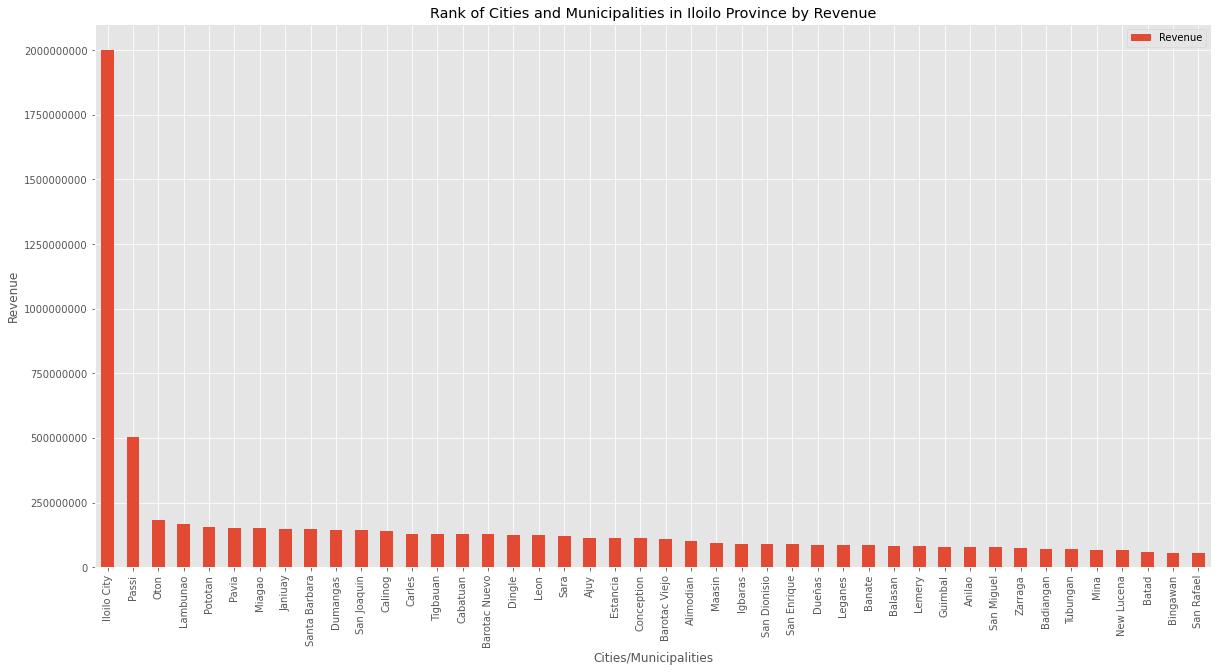

In [11]:
bar_df.plot(kind='bar', figsize=(20, 10))

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Cities/Municipalities') # add to x-label to the plot
plt.ylabel('Revenue') # add y-label to the plot
plt.title('Rank of Cities and Municipalities in Iloilo Province by Revenue') # add title to the plot

plt.show()

## Using Foursquare API for list of venues

In [12]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: PB1AOIJ30RPF31TUJ5EXMHJ2A5AHPUNGRCBO3ZDWQFJ1EKGL
CLIENT_SECRET:GQBFXIWBFUHBGZSMCU3SRL1D33CXT1I5PXRGBHDUOHU1W5D1


In [13]:
def getNearbyVenues(names, latitudes, longitudes, revenue):
    
    venues_list=[]
    for name, lat, lng, rev in zip(names, latitudes, longitudes, revenue):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            rev,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City/Municipality', 
                  'City/Municipality Latitude', 
                  'City/Municipality Longitude',
                  'City/Municipality Revenue',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

iloilo_venues = getNearbyVenues(names=Zip_Code_df['Location'], latitudes=Zip_Code_df['Latitude'], longitudes=Zip_Code_df['Longitude'], revenue=Zip_Code_df['Revenue'])

Ajuy
Alimodian
Anilao
Badiangan
Balasan
Banate
Barotac Nuevo
Barotac Viejo
Batad
Bingawan
Cabatuan
Calinog
Carles
Conception
Dingle
Dueñas
Dumangas
Estancia
Guimbal
Igbaras
Iloilo City
Janiuay
Lambunao
Leganes
Lemery
Leon
Maasin
Miagao
Mina
New Lucena
Oton
Passi
Pavia
Pototan
San Dionisio
San Enrique
San Joaquin
San Miguel
San Rafael
Santa Barbara
Sara
Tigbauan
Tubungan
Zarraga


In [14]:
#checking the results
print(iloilo_venues.shape)
iloilo_venues

(413, 8)


,City/Municipality,City/Municipality Latitude,City/Municipality Longitude,City/Municipality Revenue,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ajuy,11.094578,123.03006,1.146320e+08,7-Eleven - Ajuy,11.170586,123.018879,Convenience Store
1,Ajuy,11.094578,123.03006,1.146320e+08,Yapsonville,11.098022,123.009127,Park
2,Ajuy,11.094578,123.03006,1.146320e+08,Tigbao Beach Resort,11.111590,123.012544,Beach
3,Ajuy,11.094578,123.03006,1.146320e+08,windy willows,11.105144,123.004657,Scenic Lookout
4,Ajuy,11.094578,123.03006,1.146320e+08,Marbuena Island Resort,11.134630,123.047175,Hotel
...,...,...,...,...,...,...,...,...
408,Zarraga,10.825307,122.61503,7.399274e+07,Mercury Drug,10.822343,122.529236,Pharmacy
409,Zarraga,10.825307,122.61503,7.399274e+07,Chico Shade,10.800191,122.532854,Asian Restaurant
410,Zarraga,10.825307,122.61503,7.399274e+07,Alicia's Garden,10.786643,122.538448,Scenic Lookout
411,Zarraga,10.825307,122.61503,7.399274e+07,Nanay Sela's Restaurant,10.795394,122.533756,Filipino Restaurant


In [15]:
#Preparing/cleaning data to be used for K means clustering
K_means_data = pd.DataFrame(iloilo_venues.groupby('City/Municipality').count())
K_means_data = K_means_data.drop(['City/Municipality Latitude', 'City/Municipality Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], axis=1)
K_means_data['City/Municipality Revenue'] = [float(x) for x in revenues_df['Revenue']]
K_means_data = K_means_data.reset_index()
K_means_data

,City/Municipality,City/Municipality Revenue,Venue Category
0,Ajuy,1.146320e+08,9
1,Alimodian,1.014349e+08,5
2,Anilao,7.975098e+07,5
3,Badiangan,7.239264e+07,4
4,Balasan,8.261319e+07,4
5,Banate,8.670402e+07,4
6,Barotac Nuevo,1.276383e+08,4
7,Barotac Viejo,1.113132e+08,4
8,Batad,6.063988e+07,7
9,Bingawan,5.562662e+07,4


In [16]:
#Preparing/cleaning values for Dependent variable Y to be used for K means clustering
K_means_data_Y = pd.DataFrame(K_means_data['City/Municipality'])
K_means_data_Y

,City/Municipality
0,Ajuy
1,Alimodian
2,Anilao
3,Badiangan
4,Balasan
5,Banate
6,Barotac Nuevo
7,Barotac Viejo
8,Batad
9,Bingawan


In [17]:
#Preparing/cleaning values for Independent variable X to be used for K means clustering
K_means_data_X = pd.DataFrame(K_means_data.loc[:,['City/Municipality Revenue', 'Venue Category']])
K_means_data_X

,City/Municipality Revenue,Venue Category
0,1.146320e+08,9
1,1.014349e+08,5
2,7.975098e+07,5
3,7.239264e+07,4
4,8.261319e+07,4
5,8.670402e+07,4
6,1.276383e+08,4
7,1.113132e+08,4
8,6.063988e+07,7
9,5.562662e+07,4


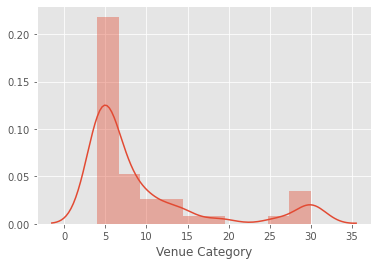

In [18]:
# Checking the distribution of Y data
sns.distplot(K_means_data_X['Venue Category'])
plt.ticklabel_format(style='plain')

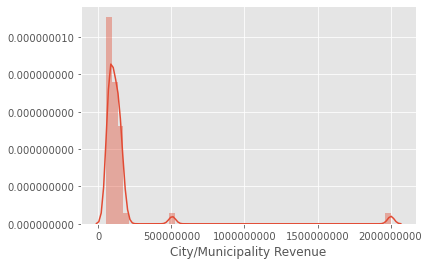

In [19]:
sns.distplot(K_means_data_X['City/Municipality Revenue'])
plt.ticklabel_format(style='plain')

In [20]:
# We will normalize the Independent variables, Y using MinMax scaler to ensure that good quality clusters will be generated
scaler = MinMaxScaler() 
K_means_data_X_scaled = pd.DataFrame(scaler.fit_transform(K_means_data_X))
K_means_data_X_scaled.columns = K_means_data_X.columns
K_means_data_X_scaled

,City/Municipality Revenue,Venue Category
0,0.030549,0.192308
1,0.023770,0.038462
2,0.012630,0.038462
3,0.008850,0.000000
4,0.014100,0.000000
5,0.016202,0.000000
6,0.037231,0.000000
7,0.028844,0.000000
8,0.002812,0.115385
9,0.000236,0.000000


In [21]:
# We will find the best K value using the Elbow Method
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(K_means_data_X_scaled) 
    kmeanModel.fit(K_means_data_X_scaled)     
      
    distortions.append(sum(np.min(cdist(K_means_data_X_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / K_means_data_X_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(K_means_data_X_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / K_means_data_X_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

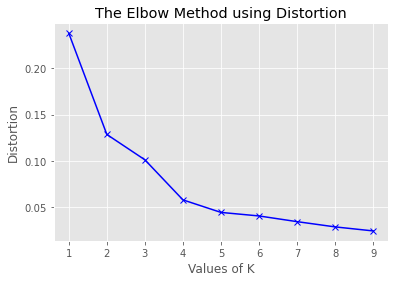

In [22]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

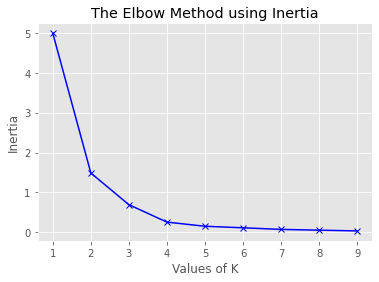

In [23]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [24]:
# We will also find the best K value using the Silhouette Score Method
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(K_means_data_X_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(K_means_data_X_scaled, labels, metric = 'euclidean'))

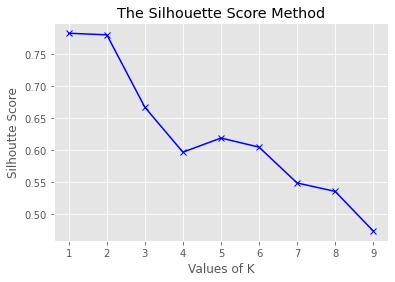

In [25]:
plt.plot(K, sil, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhoutte Score') 
plt.title('The Silhouette Score Method') 
plt.show() 

In [26]:
# We can see that the clear elbow bend is at k=3 so this is the optimal value
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(K_means_data_X_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
      dtype=int32)

In [27]:
#Calculating the silhouette score of k=3
print(f'Silhouette Score(k=3): {silhouette_score(K_means_data_X_scaled, kmeans.labels_)}')

Silhouette Score(k=3): 0.7793823823228924


In [28]:
#we will create a new dataframe for merge the input data with the cluster output
K_means_data_cluster = K_means_data.copy()
K_means_data_cluster['Cluster'] = kmeans.labels_
K_means_data_cluster.sort_values(by='Cluster')
K_means_data_cluster[K_means_data_cluster['City/Municipality'] == 'Passi']

,City/Municipality,City/Municipality Revenue,Venue Category,Cluster
31,Passi,505723102.9,6,0


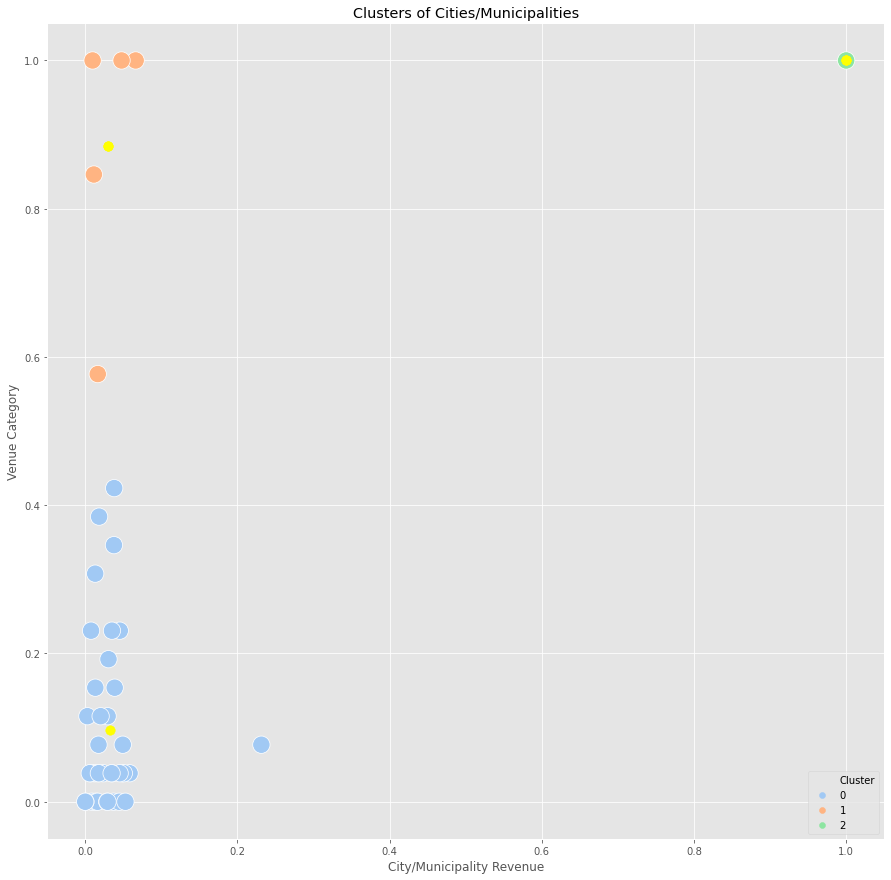

In [29]:
plt.figure(figsize=(15,15))
sns.scatterplot(K_means_data_X_scaled['City/Municipality Revenue'], K_means_data_X_scaled['Venue Category'],hue=K_means_data_cluster['Cluster'], palette='pastel', s=300)
plt.ticklabel_format(style='plain', axis='y')

plt.scatter(kmeans.cluster_centers_[0:, 0], kmeans.cluster_centers_[0:, 1], s=90, c='yellow', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[1:, 0], kmeans.cluster_centers_[1:, 1], s=90, c='yellow', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[2:, 0], kmeans.cluster_centers_[2:, 1], s=90, c='yellow', label = 'Centroids')
plt.title('Clusters of Cities/Municipalities')
plt.show()

## Analysis:

<b>Cluster 0 - Low # of known venues and Revenue is less than half of the highest revenue count in the whole Iloilo Province

Cluster 1 - High # of known venues and Revenue is the highest revenue count in the whole Iloilo Province

Cluster 2 - High # of known venues and Revenue is less than half of the highest revenue count in the whole Iloilo Province</b>


Passi City belongs to Cluster 0 where there is low number of known venues and its revenue is less than half of the highest revenue count in the whole Iloilo Province.

Based on the provided output of our model, Passi City's revenue compared to the maximum contributor, Iloilo City, is still very low. 

Given the fact that Iloilo City is the capital of Iloilo province, it is more known to tourists and businessmen. We can assume that one factor can be that the marketing and publicity is better than that of Passi City and it helped increase the revenue of the city. <b>The proof of this assumption is a good consideration for the next milestone of this project.</b>

According to our analysis, to increase the revenue, we can consider improving the tourism sector of Passi City by boosting the marketing and publicity of the city's tourist spots and businesses to attract more tourists and businessmen/investors.

## Suggestion:


With the data we used for this project, we can suggest insights of what kind of business will be known to prospects in Passi City.

In [30]:
# one hot encoding
iloilo_onehot = pd.get_dummies(iloilo_venues[['Venue Category']], prefix="", prefix_sep="")

# add City/Municipality column back to dataframe
iloilo_onehot['City/Municipality'] = iloilo_venues['City/Municipality'] 

# move City/Municipality column to the first column
fixed_columns = [iloilo_onehot.columns[-1]] + list(iloilo_onehot.columns[:-1])
iloilo_onehot = iloilo_onehot[fixed_columns]

iloilo_onehot

,City/Municipality,Airport,Airport Lounge,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,...,Shopping Mall,Snack Place,Spa,Steakhouse,Street Food Gathering,Tea Room,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Trail
0,Ajuy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ajuy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ajuy,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Ajuy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ajuy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,Zarraga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,Zarraga,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,Zarraga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411,Zarraga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
iloilo_grouped = iloilo_onehot.groupby('City/Municipality').mean().reset_index()
iloilo_grouped

,City/Municipality,Airport,Airport Lounge,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,...,Shopping Mall,Snack Place,Spa,Steakhouse,Street Food Gathering,Tea Room,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Trail
0,Ajuy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.111111
1,Alimodian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
2,Anilao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
3,Badiangan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
4,Balasan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
5,Banate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
6,Barotac Nuevo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
7,Barotac Viejo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
8,Batad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
9,Bingawan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000


### Here are the top known venue categories in Passi City based on Foursquare API data:

In [32]:
num_top_venues = 5

passi_top = pd.DataFrame(iloilo_grouped[iloilo_grouped['City/Municipality'] == 'Passi'].T.reset_index())
passi_top.columns = ['venue','freq']
passi_top = passi_top.iloc[1:]
passi_top['freq'] = passi_top['freq'].astype(float)
passi_top = passi_top.round({'freq': 2})
passi_top = passi_top.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
passi_top

,venue,freq
0,Convenience Store,0.17
1,American Restaurant,0.17
2,Plaza,0.17
3,Coffee Shop,0.17
4,Food,0.17


### Here are the top known venue categories in Iloilo City based on Foursquare API data:

In [33]:
num_top_venues = 20

iloilo_top = pd.DataFrame(iloilo_grouped[iloilo_grouped['City/Municipality'] == 'Iloilo City'].T.reset_index())
iloilo_top.columns = ['venue','freq']
iloilo_top = iloilo_top.iloc[1:]
iloilo_top['freq'] = iloilo_top['freq'].astype(float)
iloilo_top = iloilo_top.round({'freq': 2})
iloilo_top = iloilo_top.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
iloilo_top

,venue,freq
0,Seafood Restaurant,0.10
1,Café,0.10
2,Spa,0.07
3,Asian Restaurant,0.07
4,BBQ Joint,0.07
5,Bakery,0.07
6,Filipino Restaurant,0.07
7,Tea Room,0.07
8,Restaurant,0.07
9,Italian Restaurant,0.03


### Here are the top known venue categories in Cluster 1 based on Foursquare API data:

Although the municipalities in Cluster 1 has many number of venues than that of Cluster 0 where Passi City is, we can still consider their top venues.

In [34]:
# add the cluster in the dataframe
iloilo_grouped_clust = iloilo_grouped.copy()
iloilo_grouped_clust['Cluster'] = K_means_data_cluster['Cluster']
temp = iloilo_grouped_clust[(iloilo_grouped_clust.loc[:,['Cluster']] != 1).all(axis=1)]
iloilo_grouped_clust = iloilo_grouped_clust.drop(temp.index)
iloilo_grouped_clust = iloilo_grouped_clust.drop(columns=['Cluster'])
iloilo_grouped_clust

,City/Municipality,Airport,Airport Lounge,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,...,Shopping Mall,Snack Place,Spa,Steakhouse,Street Food Gathering,Tea Room,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Trail
23,Leganes,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.052632,0.0,0.0,...,0.052632,0.0,0.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.0,0.0
30,Oton,0.000000,0.000000,0.0,0.000000,0.100000,0.066667,0.000000,0.0,0.0,...,0.033333,0.0,0.033333,0.033333,0.000000,0.033333,0.0,0.000000,0.0,0.0
37,San Miguel,0.038462,0.000000,0.0,0.000000,0.038462,0.000000,0.076923,0.0,0.0,...,0.038462,0.0,0.000000,0.000000,0.038462,0.000000,0.0,0.000000,0.0,0.0
39,Santa Barbara,0.100000,0.033333,0.0,0.000000,0.000000,0.000000,0.066667,0.0,0.0,...,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
43,Zarraga,0.000000,0.000000,0.0,0.033333,0.033333,0.000000,0.033333,0.0,0.0,...,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.033333,0.0,0.0


In [35]:
for hood in iloilo_grouped_clust['City/Municipality']:
    print("----"+hood+"----")
    passi_top = pd.DataFrame(iloilo_grouped_clust[iloilo_grouped_clust['City/Municipality'] == hood].T.reset_index())
    passi_top.columns = ['venue','freq']
    passi_top = passi_top.iloc[1:]
    passi_top['freq'] = passi_top['freq'].astype(float)
    passi_top = passi_top.round({'freq': 2})
    print(passi_top.sort_values('freq', ascending=False).reset_index(drop=True).head())
    print('\n')

----Leganes----
                 venue  freq
0   Seafood Restaurant  0.42
1    Korean Restaurant  0.05
2           Steakhouse  0.05
3  Filipino Restaurant  0.05
4           Restaurant  0.05


----Oton----
                venue  freq
0  Seafood Restaurant  0.13
1    Asian Restaurant  0.10
2         Pizza Place  0.07
3           BBQ Joint  0.07
4               Hotel  0.07


----San Miguel----
                  venue  freq
0    Seafood Restaurant  0.15
1                Bakery  0.08
2   Filipino Restaurant  0.08
3  Fast Food Restaurant  0.08
4                Resort  0.08


----Santa Barbara----
                 venue  freq
0              Airport  0.10
1   Seafood Restaurant  0.10
2    Convenience Store  0.10
3               Bakery  0.07
4  Filipino Restaurant  0.07


----Zarraga----
                 venue  freq
0   Seafood Restaurant  0.27
1    Food & Drink Shop  0.10
2  Filipino Restaurant  0.07
3          Pizza Place  0.07
4                Plaza  0.03


